
# Salary Prediction Model

This notebook demonstrates a complete workflow for building a salary prediction model using machine learning. The model is trained using a Random Forest Regressor, and its hyperparameters are optimized with GridSearchCV. The final model is exported for later use in production.

**Sections:**
1. Data Preprocessing
2. Model Training and Hyperparameter Tuning
3. Model Evaluation
4. Model Export
5. Model Testing

Let's dive in!


## Importing Necessary Libraries

In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings


warnings.filterwarnings('ignore')

In [2]:
# Code Block
df = pd.read_csv("../Data/Cleaned/glassdoor-cleaned.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_datatools,job_devops,job_education,job_experience
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\n· Analyze and organize raw d...,70000,Medium,Company - Private,Information Technology,Information Technology Support Services,...,na,"['sql', 'java', 'python']",[],[],[],[],[],[],NaN,0-2 years
1,Futuretech Consultants LLC,3.9,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500,Unknown,NaN,NaN,NaN,...,na,"['sql', 'c']",[],['ssis'],['snowflake'],[],[],[],bachelor,2-5 years
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\nMust have 5-8+ Years of expe...,121500,Small,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,na,"['sql', 'python']",['aws'],[],['databricks'],['spark'],[],[],master,0-2 years
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\nPosted: Dec 22, 2021\nWeekly Hours: 4...",115173,Very Large,Company - Public,Information Technology,Computer Hardware Development,...,na,"['c', 'python']",[],['tableau'],[],[],[],[],NaN,NaN
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\nTechnical experience in ...,117000,Small,Company - Public,NaN,NaN,...,na,['sql'],[],['tableau'],['oracle'],[],[],[],bachelor,5-10 years


### Feature Engineering

#### Making a new dataframe with relevant features for the regression model

In [3]:
# Code Block
cols_model = ['job_state', 'seniority', 'job_education', 'job_experience', 'company_industry', 'company_rating', 'salary_estimate']

df_model = df[cols_model]
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,CA,na,NaN,0-2 years,Information Technology Support Services,4.7,70000
1,MS,na,bachelor,2-5 years,NaN,3.9,76500
2,Remote,na,master,0-2 years,Biotech & Pharmaceuticals,4.4,121500
3,CA,na,NaN,NaN,Computer Hardware Development,4.2,115173
4,MD,na,bachelor,5-10 years,NaN,5.0,117000


#### Dropping some states and company industries that have below 5 data points.

In [4]:
# Code Block
jobstate_count = df_model['job_state'].value_counts()
jobstate_count

Remote            184
CA                127
TX                112
VA                 57
MA                 42
GA                 41
IL                 40
NJ                 39
NY                 36
DC                 33
OH                 30
PA                 28
FL                 28
NC                 27
MN                 25
WA                 23
OR                 20
CO                 17
MD                 17
WI                 15
UT                 13
MO                 13
AZ                 12
MI                  9
TN                  8
CT                  8
DE                  7
IN                  6
NV                  6
SC                  5
MS                  4
IA                  4
OK                  4
KS                  3
KY                  3
LA                  2
AR                  2
ME                  2
Manhattan           2
NE                  2
AL                  2
ID                  1
Rhode Island        1
HI                  1
NH                  1
WV        

In [5]:
# Code Block
states_g5 = jobstate_count[jobstate_count > 5].index.tolist()

df_model = df_model[df_model["job_state"].isin(states_g5)]
df_model['job_state'].value_counts()

Remote    184
CA        127
TX        112
VA         57
MA         42
GA         41
IL         40
NJ         39
NY         36
DC         33
OH         30
FL         28
PA         28
NC         27
MN         25
WA         23
OR         20
CO         17
MD         17
WI         15
UT         13
MO         13
AZ         12
MI          9
TN          8
CT          8
DE          7
IN          6
NV          6
Name: job_state, dtype: int64

## For the Predict Salary page

In [6]:
# Code Block
df_model['company_rating'].unique()

array([4.7, 4.4, 4.2, 5. , 2.7, 3.8, 4.8, 4.1, 1. , 3.1, 3.5, 4. , 4.5,
       3.9, 4.3, 3.2, 2.6, 3.6, 4.9, 2.8, 4.6, 3.7, 3.4, 3. , 3.3, 2. ,
       2.9, 2.5, 2.3, 2.2, 1.3, 1.8])

In [7]:
# Code Block
df_model['company_industry'].unique()

array(['Information Technology Support Services',
       'Biotech & Pharmaceuticals', 'Computer Hardware Development', nan,
       'Research & Development', 'Health Care Services & Hospitals',
       'Internet & Web Services', 'HR Consulting',
       'Consumer Product Manufacturing', 'Investment & Asset Management',
       'Accounting & Tax', 'Business Consulting',
       'Enterprise Software & Network Solutions',
       'Financial Transaction Processing', 'Staffing & Subcontracting',
       'Banking & Lending', 'Travel Agencies',
       'Airlines, Airports & Air Transportation', 'Sports & Recreation',
       'National Agencies', 'Aerospace & Defense', 'Software Development',
       'Beauty & Wellness', 'Publishing', 'Food & Beverage Manufacturing',
       'Energy & Utilities', 'Advertising & Public Relations',
       'Wholesale', 'Department, Clothing & Shoe Stores',
       'Machinery Manufacturing', 'Crop Production',
       'Colleges & Universities', 'Pet & Pet Supplies Stores',
   

#### One Hot Encoding

## Importing Necessary Libraries

In [8]:
# Import libraries
from sklearn.preprocessing import LabelEncoder

In [9]:
# Code Block
le_state = LabelEncoder()
df_model['job_state'] = le_state.fit_transform(df_model['job_state'])
df_model['job_state'].unique()

array([ 1, 22, 11, 18, 10,  7, 24, 13, 26, 16,  4, 28,  8, 20, 21, 25, 19,
        5, 23,  2, 15,  6,  0,  3, 27, 14, 12,  9, 17])

In [10]:
# Code Block
le_sen = LabelEncoder()
df_model['seniority'] = le_sen.fit_transform(df_model['seniority'])
df_model['seniority'].unique()

array([0, 1])

In [11]:
# Code Block
le_edu = LabelEncoder()
df_model['job_education'] = le_edu.fit_transform(df_model['job_education'])
df_model['job_education'].unique()

array([2, 1, 0])

In [12]:
# Code Block
le_indu = LabelEncoder()
df_model['company_industry'] = le_indu.fit_transform(df_model['company_industry'])
df_model['company_industry'].unique()

array([44,  7, 18, 77, 63, 41, 47, 39, 20, 48,  0, 11, 29, 32, 69,  5, 74,
        3, 68, 56,  2, 67,  6, 60, 33, 28,  1, 76, 24, 51, 22, 16, 58, 61,
       75, 71, 26, 54, 73, 13, 53, 64, 38, 45, 34, 46, 70, 15, 36,  9, 12,
       66,  4, 72, 65, 52, 49, 27, 40, 14, 30,  8, 50, 23, 31, 19, 43, 57,
       17, 37, 35, 55, 59, 62, 25, 42, 10, 21])

In [13]:
# Code Block
unique_company_ratings = np.sort(df_model['company_rating'].unique())
unique_company_ratings

array([1. , 1.3, 1.8, 2. , 2.2, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1,
       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4,
       4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [14]:
# Code Block
le_rating = LabelEncoder()
df_model['company_rating'] = le_rating.fit_transform(df_model['company_rating'])
df_model['company_rating'].unique()

array([28, 25, 23, 31,  8, 19, 29, 22,  0, 12, 16, 21, 26, 20, 24, 13,  7,
       17, 30,  9, 27, 18, 15, 11, 14,  3, 10,  6,  5,  4,  1,  2])

In [15]:
# Code Block
le_exp = LabelEncoder()
df_model['job_experience'] = le_exp.fit_transform(df_model['job_experience'])
df_model['job_experience'].unique()

array([1, 4, 3, 0, 2])

In [16]:
# Code Block
df_model.head()

,job_state,seniority,job_education,job_experience,company_industry,company_rating,salary_estimate
0,1,0,2,1,44,28,70000
2,22,0,1,1,7,25,121500
3,1,0,2,4,18,23,115173
4,11,0,0,3,77,31,117000
5,18,0,2,4,63,25,237500


<AxesSubplot: >

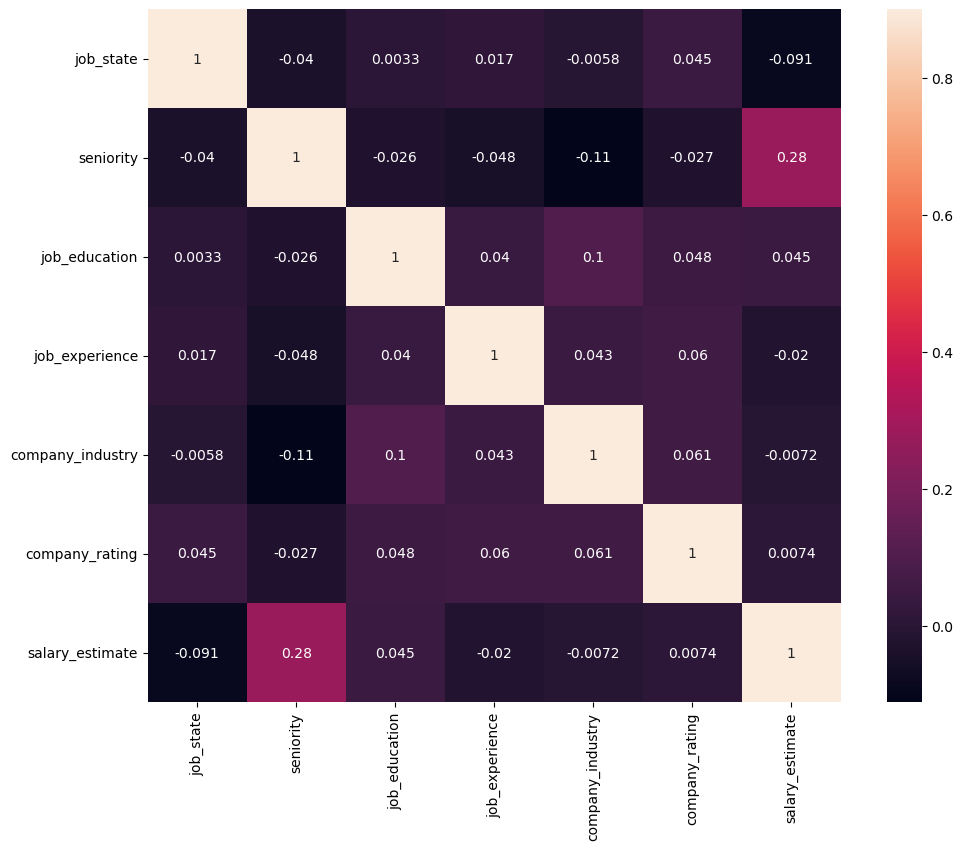

In [17]:
# Code Block
corrmat = df_model.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, annot=True, square=True)

#### The salary is moderatly correlated with the seniority, company industry and company rating. Suprisingly it is negatively correlated with the job experience needed and the job state.

## Multiple Linear Regression

## Importing Necessary Libraries

In [18]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
# Code Block
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

In [20]:
# Code Block
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
# Code Block
model = LinearRegression()

In [22]:
# Code Block
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Code Block
predictions = model.predict(X_test)

In [24]:
# Code Block
print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, predictions), 2)}')

Mean Absolute Error : $17329.24


In [25]:
# Code Block
error = np.sqrt(mean_squared_error(y_test, predictions))
print("Error : ${:,.02f}".format(error)) 

Error : $24,528.56


## Random Forest Regressor Model

## Importing Necessary Libraries

In [26]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor

In [27]:
# Code Block
X = df_model.drop("salary_estimate", axis=1)
y = df_model["salary_estimate"].values

### Hyperparameter Tuning

In [28]:
# Using GridSearchCV to find the best parameters for RandomForestRegressor
max_depth = [None, 2, 4, 6, 8, 10, 12]

parameters = {"max_depth": max_depth}

regressor = RandomForestRegressor(n_estimators = 100, random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [29]:
# Code Block
regressor = gs.best_estimator_

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(f'Mean Absolute Error : ${round(mean_absolute_error(y_test, y_pred), 2)}')
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error : ${:,.02f}".format(error)) 

Mean Absolute Error : $16806.88
Error : $24,348.52


In [30]:
# Code Block
errors = abs(y_pred - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

Accuracy: 84.88 %


## Training the Model

In [31]:
# Code Block
regressor.fit(X, y)

RandomForestRegressor(max_depth=6, random_state=0)

## Importing Necessary Libraries

In [32]:
# Import libraries
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(cols_model, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: job_state            Importance: 0.26
Variable: company_industry     Importance: 0.22
Variable: company_rating       Importance: 0.2
Variable: seniority            Importance: 0.19
Variable: job_experience       Importance: 0.08
Variable: job_education        Importance: 0.04


[None, None, None, None, None, None]

In [33]:
# Code Block
# job_state, seniority, job_education, job_experience, company_industry, company_rating

X_example =  np.array([["CA", "senior", "bachelor", "0-2 years", "Information Technology Support Services", 4.5]])

In [34]:
# Code Block
X_example[:, 0] = le_state.transform(X_example[:,0])
X_example[:, 1] = le_sen.transform(X_example[:,1])
X_example[:, 2] = le_edu.transform(X_example[:,2])
X_example[:, 3] = le_exp.transform(X_example[:,3])
X_example[:, 4] = le_indu.transform(X_example[:,4])
X_example[:, 5] = le_rating.transform(X_example[:,5])

X_example = X_example.astype(float)
X_example

array([[ 1.,  1.,  0.,  1., 44., 26.]])

In [35]:
# Code Block
y_pred = regressor.predict(X_example)
salary = int(y_pred[0])
print(f"Predicted salary: ${salary:,}")

Predicted salary: $126,735


## Model Export

## Importing Necessary Libraries

In [36]:
# Import libraries
import pickle

data = {"model": regressor, "le_state": le_state, "le_sen": le_sen, "le_edu": le_edu, "le_exp": le_exp, "le_indu": le_indu, "le_rating": le_rating}

with open('../Models/model_salary_pred.pkl', 'wb') as file:
    pickle.dump(data, file)

#### Let's test our model after importing it from the pickle file

### Exporting the Model

In [37]:
# Exporting the trained model and necessary encoders
with open('../Models/model_salary_pred.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_state = data["le_state"]
le_sen = data["le_sen"]
le_edu = data["le_edu"]
le_exp = data["le_exp"]
le_indu = data["le_indu"]
le_rating = data["le_rating"]

In [38]:
# Code Block
y_pred = regressor_loaded.predict(X_example)
salary = int(y_pred[0])
print(f"Predicted salary: ${salary:,}")

Predicted salary: $126,735



## Model Performance and Accuracy

The model's performance is evaluated using the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). These metrics provide insights into how well the model is performing:

- **MAE:** Represents the average magnitude of errors in a set of predictions, without considering their direction.
- **RMSE:** Measures the square root of the average of squared differences between predicted and observed values, penalizing larger errors more than MAE.

**Accuracy:** The accuracy is calculated based on the percentage of correctly predicted salary values within the given test set.


### Visualizing Feature Importance

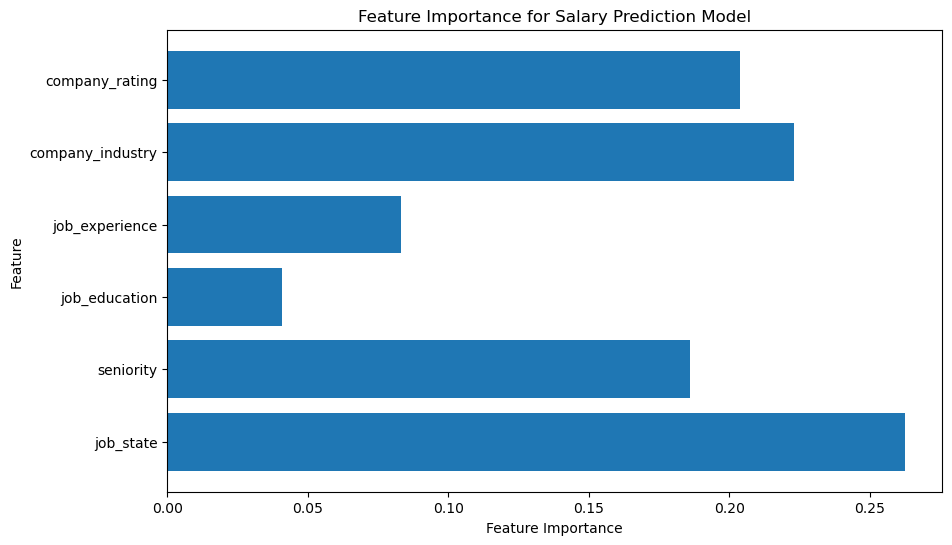

In [40]:

import matplotlib.pyplot as plt

# Feature importance visualization
importance = regressor.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Salary Prediction Model")
plt.show()
